# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
record_count = 0
set_count = 1
cities_cloudiness = list()
countries = list()
dates = list()
humidities = list()
response_latitudes = list()
response_longitudes = list()
max_temperatures = list()
wind_speeds = list()
print("Begging Data Retrieval")
print("-----------------------------")
for city in cities:
    record_count += 1
    # Generating request
    weather_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q=" + city 
    print(f"Processing Record {record_count} of Set {set_count} | {city} ")    
    response = requests.get(weather_url).json()
    # Collecting Data
    try:
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        response_latitude = response["coord"]["lat"]
        response_longitude = response["coord"]["lon"]
        max_temperature = response["main"]["temp_max"]
        wind_speed = response["wind"]["speed"]
    except KeyError:
        print("City not found. Skipping...")
        cities.remove(city)
    # Storing it!
    cities_cloudiness.append(cloudiness)
    countries.append(country)
    dates.append(date)
    humidities.append(humidity)
    response_latitudes.append(response_latitude)
    response_longitudes.append(response_longitude)
    max_temperatures.append(max_temperature)
    wind_speeds.append(wind_speed)
    if record_count == 50:
        record_count = 0
        set_count += 1
else:
    print("-----------------------------")
    print("Data Retrieval Complete")
    print("-----------------------------")

Begging Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | souillac 
Processing Record 2 of Set 1 | punta arenas 
Processing Record 3 of Set 1 | bengkulu 
Processing Record 4 of Set 1 | rio gallegos 
Processing Record 5 of Set 1 | bluff 
Processing Record 6 of Set 1 | la asuncion 
Processing Record 7 of Set 1 | jamestown 
Processing Record 8 of Set 1 | cape town 
Processing Record 9 of Set 1 | busselton 
Processing Record 10 of Set 1 | sao filipe 
Processing Record 11 of Set 1 | villaviciosa 
Processing Record 12 of Set 1 | rikitea 
Processing Record 13 of Set 1 | tuktoyaktuk 
Processing Record 14 of Set 1 | wajid 
Processing Record 15 of Set 1 | kodiak 
Processing Record 16 of Set 1 | vertientes 
Processing Record 17 of Set 1 | mataura 
Processing Record 18 of Set 1 | hervey bay 
Processing Record 19 of Set 1 | ushuaia 
Processing Record 20 of Set 1 | puerto ayora 
Processing Record 21 of Set 1 | vaini 
Processing Record 22 of Set 1 | barrow 
Processing Record

Processing Record 35 of Set 4 | brunswick 
Processing Record 36 of Set 4 | bonavista 
Processing Record 37 of Set 4 | bosaso 
Processing Record 38 of Set 4 | fort dix 
Processing Record 39 of Set 4 | santa isabel do rio negro 
Processing Record 40 of Set 4 | lavrentiya 
Processing Record 41 of Set 4 | marzuq 
Processing Record 42 of Set 4 | samusu 
City not found. Skipping...
Processing Record 43 of Set 4 | lata 
Processing Record 44 of Set 4 | cairns 
Processing Record 45 of Set 4 | tarudant 
City not found. Skipping...
Processing Record 46 of Set 4 | yellowknife 
Processing Record 47 of Set 4 | suntar 
Processing Record 48 of Set 4 | tiksi 
Processing Record 49 of Set 4 | dikson 
Processing Record 50 of Set 4 | seredka 
Processing Record 1 of Set 5 | laguna 
Processing Record 2 of Set 5 | qaanaaq 
Processing Record 3 of Set 5 | beisfjord 
Processing Record 4 of Set 5 | chiriqui grande 
Processing Record 5 of Set 5 | itacoatiara 
Processing Record 6 of Set 5 | odate 
Processing Record

Processing Record 19 of Set 8 | nanortalik 
Processing Record 20 of Set 8 | mitu 
Processing Record 21 of Set 8 | todos santos 
Processing Record 22 of Set 8 | ormara 
Processing Record 23 of Set 8 | narrabri 
Processing Record 24 of Set 8 | san patricio 
Processing Record 25 of Set 8 | la ronge 
Processing Record 26 of Set 8 | san nicolas 
Processing Record 27 of Set 8 | kysyl-syr 
Processing Record 28 of Set 8 | yaan 
Processing Record 29 of Set 8 | gbadolite 
Processing Record 30 of Set 8 | zhezkazgan 
Processing Record 31 of Set 8 | berdigestyakh 
Processing Record 32 of Set 8 | saint george 
Processing Record 33 of Set 8 | margate 
Processing Record 34 of Set 8 | guerrero negro 
Processing Record 35 of Set 8 | machico 
Processing Record 36 of Set 8 | vao 
Processing Record 37 of Set 8 | balaka 
Processing Record 38 of Set 8 | turtkul 
City not found. Skipping...
Processing Record 39 of Set 8 | the valley 
Processing Record 40 of Set 8 | umm lajj 
Processing Record 41 of Set 8 | se

City not found. Skipping...
Processing Record 50 of Set 11 | moberly 
Processing Record 1 of Set 12 | atar 
Processing Record 2 of Set 12 | lima 
Processing Record 3 of Set 12 | gummidipundi 
Processing Record 4 of Set 12 | dinsor 
City not found. Skipping...
Processing Record 5 of Set 12 | kandrian 
Processing Record 6 of Set 12 | griffith 
Processing Record 7 of Set 12 | viransehir 
Processing Record 8 of Set 12 | hellvik 
Processing Record 9 of Set 12 | hunterville 
Processing Record 10 of Set 12 | gravdal 
Processing Record 11 of Set 12 | kaa-khem 
Processing Record 12 of Set 12 | hope mills 
Processing Record 13 of Set 12 | lasa 
Processing Record 14 of Set 12 | rio branco 
Processing Record 15 of Set 12 | niquelandia 
Processing Record 16 of Set 12 | ranau 
Processing Record 17 of Set 12 | samalaeulu 
City not found. Skipping...
Processing Record 18 of Set 12 | wakkanai 
Processing Record 19 of Set 12 | vaitape 
Processing Record 20 of Set 12 | mujiayingzi 
Processing Record 21 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_data_frame = pd.DataFrame({
    "City": cities,
    "Cloudiness": cities_cloudiness,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": response_latitudes,
    "Lng": response_longitudes,
    "Max Temp": max_temperatures,
    "Wind Speed": wind_speeds,   
})
city_data_frame.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,souillac,40,MU,1580954289,83,-20.52,57.52,299.15,4.60
1,punta arenas,100,CL,1580953994,70,-53.15,-70.92,282.15,2.44
2,bengkulu,89,ID,1580954174,61,-3.80,102.27,303.15,0.86
3,rio gallegos,20,AR,1580954292,57,-51.62,-69.22,283.15,3.10
4,bluff,42,NZ,1580954292,66,-46.60,168.33,287.59,7.15


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs Temperature Plot')

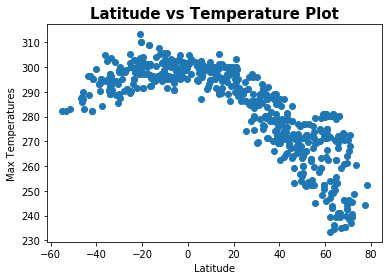

In [5]:
cities_latitude = city_data_frame["Lat"]
cities_temperature = city_data_frame["Max Temp"]
plt.scatter(cities_latitude, cities_temperature)
plt.ylabel("Max Temperatures")
plt.xlabel("Latitude")
plt.title("Latitude vs Temperature Plot", fontsize=15, fontweight=800)

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs Humidity Plot')

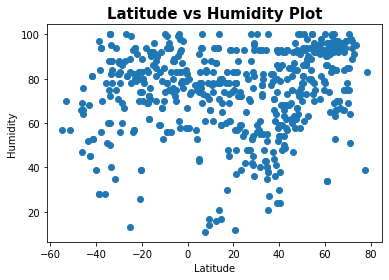

In [6]:
cities_humidity = city_data_frame["Humidity"]
plt.scatter(cities_latitude, cities_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity Plot", fontsize=15, fontweight=800)

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudliness')

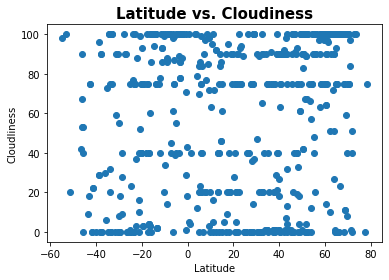

In [7]:
cities_cloudiness = city_data_frame["Cloudiness"]
plt.scatter(cities_latitude, cities_cloudiness)
plt.title("Latitude vs. Cloudiness", fontsize=15, fontweight=800)
plt.xlabel("Latitude")
plt.ylabel("Cloudliness")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

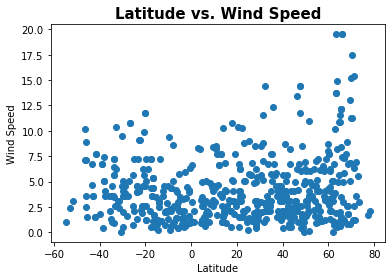

In [8]:
cities_wind_speed = city_data_frame["Wind Speed"]
plt.scatter(cities_latitude, cities_wind_speed)
plt.title("Latitude vs. Wind Speed", fontsize=15, fontweight=800)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(first_data, second_data, xlabel=None, ylabel=None, title=None, label_position=None):
    """Creates scatter plots with linear regression
    against two list of values"""
    # Creating linear regression
    slope, intercept, r_value, p_value, standard_value = linregress(first_data, second_data)
    # Fitting values
    fit = slope * first_data + intercept
    # Creating label
    function_label = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(first_data, second_data, color="white")
    plt.gca().set_facecolor("black")
    plt.plot(first_data, fit, color="#3FFE40")
    y_annotate_label = second_data.sort_values().reset_index(drop=all)[0]
    x_annotate_label = first_data.sort_values().reset_index(drop=all)[0]
    # plt.legend(loc="upper center", bbox_to_anchor=(0.05, .5), title="Fit", shadow=True)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title, fontsize=15, fontweight=800)
    if label_position:
        plt.annotate(function_label, (label_position[0], label_position[1]), color="#3FFE40", fontsize=15)
    else:
        plt.annotate(function_label, (x_annotate_label, y_annotate_label), color="#3FFE40", fontsize=15)
    print("The r-squared is " + str(r_value))

In [10]:
# Create Northern and Southern Hemisphere DataFrames
northern_data_frame = city_data_frame.loc[city_data_frame["Lat"] >= 0, :]
southern_data_frame = city_data_frame.loc[city_data_frame["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.8461126512229928


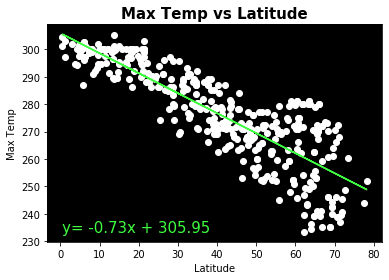

In [11]:
linear_regression_plot(
    northern_data_frame["Lat"],
    northern_data_frame["Max Temp"],
    xlabel="Latitude",
    ylabel="Max Temp",
    title="Max Temp vs Latitude"
)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5251351336478657


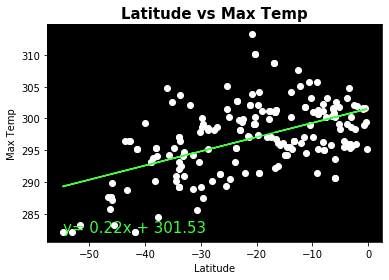

In [12]:
linear_regression_plot(
    southern_data_frame["Lat"],
    southern_data_frame["Max Temp"],
    xlabel="Latitude",
    ylabel="Max Temp",
    title="Latitude vs Max Temp"
)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.3311360689641866


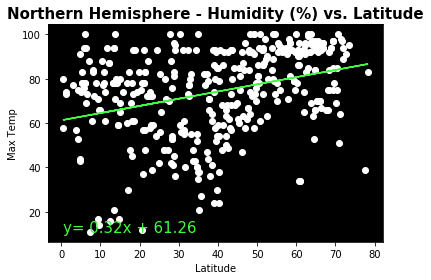

In [13]:
linear_regression_plot(
    northern_data_frame["Lat"],
    northern_data_frame["Humidity"],
    xlabel="Latitude",
    ylabel="Max Temp",
    title="Northern Hemisphere - Humidity (%) vs. Latitude"
)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.31909339810235055


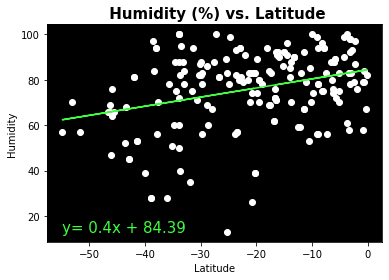

In [14]:
linear_regression_plot(
    southern_data_frame["Lat"],
    southern_data_frame["Humidity"],
    xlabel="Latitude",
    ylabel="Humidity",
    title=" Humidity (%) vs. Latitude"
)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.2519159665898982


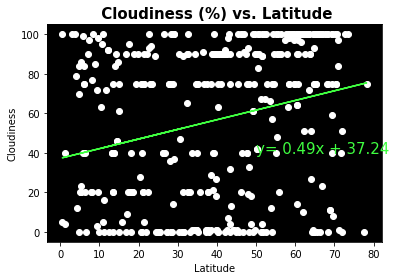

In [15]:
linear_regression_plot(
    northern_data_frame["Lat"],
    northern_data_frame["Cloudiness"],
    xlabel="Latitude",
    ylabel="Cloudiness",
    title=" Cloudiness (%) vs. Latitude",
    label_position=(50, 40)
)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.2865512175564822


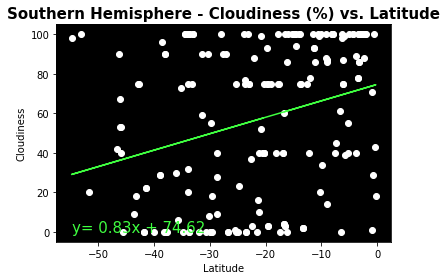

In [16]:
linear_regression_plot(
    southern_data_frame["Lat"],
    southern_data_frame["Cloudiness"],
    xlabel="Latitude",
    ylabel="Cloudiness",
    title="Southern Hemisphere - Cloudiness (%) vs. Latitude"
)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.1962044690849806


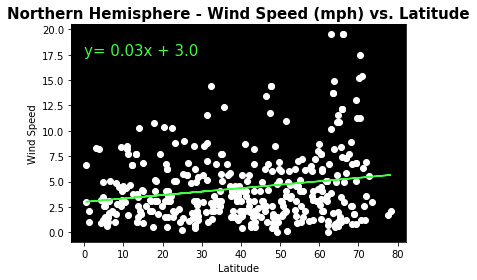

In [17]:
linear_regression_plot(
    first_data=northern_data_frame["Lat"],
    second_data=northern_data_frame["Wind Speed"],
    xlabel="Latitude",
    ylabel="Wind Speed",
    title="Northern Hemisphere - Wind Speed (mph) vs. Latitude",
    label_position=(0, 17.5)
)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.29331610809137076


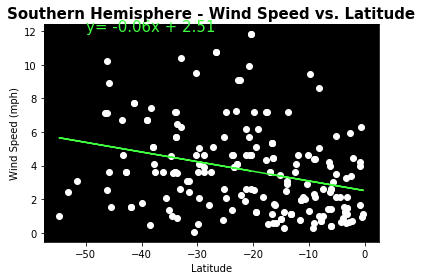

In [18]:
linear_regression_plot(
    first_data=southern_data_frame["Lat"],
    second_data=southern_data_frame["Wind Speed"],
    xlabel="Latitude",
    ylabel="Wind Speed (mph)",
    title="Southern Hemisphere - Wind Speed vs. Latitude",
    label_position=(-50, 12)
)

In [24]:
city_data_frame.to_csv(output_data_file)

# Three observable trends
---
* At time we move from Southern Hemisphere to Northen Hemisphere Wind speed instead of decrease it increase.
* There are more cloudiness in southern hemisphere instead of northen hemisphere
* And temperature is hottest if we get closer to equator and colder if we move away